# CardioGoodFitness

This was a group exercise on storytelling carried out during the L4 Data Analysis Bootcamp delivered by Cambridge Sparks.

#### Scenario:

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill
product offered by CardioGoodFitness. The market research team decides to investigate whether there are differences across the
product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a
CardioGoodFitness retail store in the last three months. The data are stored in the CardioGoodFitness.csv file.


#### Task

In your groups, your task is to review the dataset and perform some analysis to tell a story about
CardioGoodFitness customers that will guide the market research team.

#### Hypothesis

We predict that distinct user profiles will emerge for the 3 treadmills, with differing income/gender/age etc, having an influence on buying habits and the types of products that our customers will purchase.

### Data Processing/Cleaning

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('CardioGoodFitness.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [16]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [17]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [18]:
df.describe(include='O')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


In [19]:
for col in df.select_dtypes(include=['O']).columns:
    print (df[col].value_counts())
    print ('=' * 40)

Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64
Gender
Male      104
Female     76
Name: count, dtype: int64
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


In [20]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [21]:
display(f'Rows = {df.shape[0]}')
display(f'Columns = {df.shape[1]}')

'Rows = 180'

'Columns = 9'

### Data Analysis

I will begin by grouping by product and looking at the average (mean) for the numeric columns

In [23]:
df.groupby(by='Product')[['Age','Fitness','Income','Usage','Miles','Education']].mean()

,Age,Fitness,Income,Usage,Miles,Education
Product,,,,,,
TM195,28.55,2.9625,46418.025,3.087500,82.787500,15.037500
TM498,28.90,2.9000,48973.650,3.066667,87.933333,15.116667
TM798,29.10,4.6250,75441.575,4.775000,166.900000,17.325000


Already we've gained some insights - TM798 appears to be purchased by households with a higher average income, higher predicted usage, higher expected miles ran and higher self-declared fitness.

In [25]:
df_prod = df.groupby(by='Product')[['Age']].count()
df_gen = df.groupby(by='Gender')[['Age']].count()
df_mars = df.groupby(by='MaritalStatus')[['Age']].count()

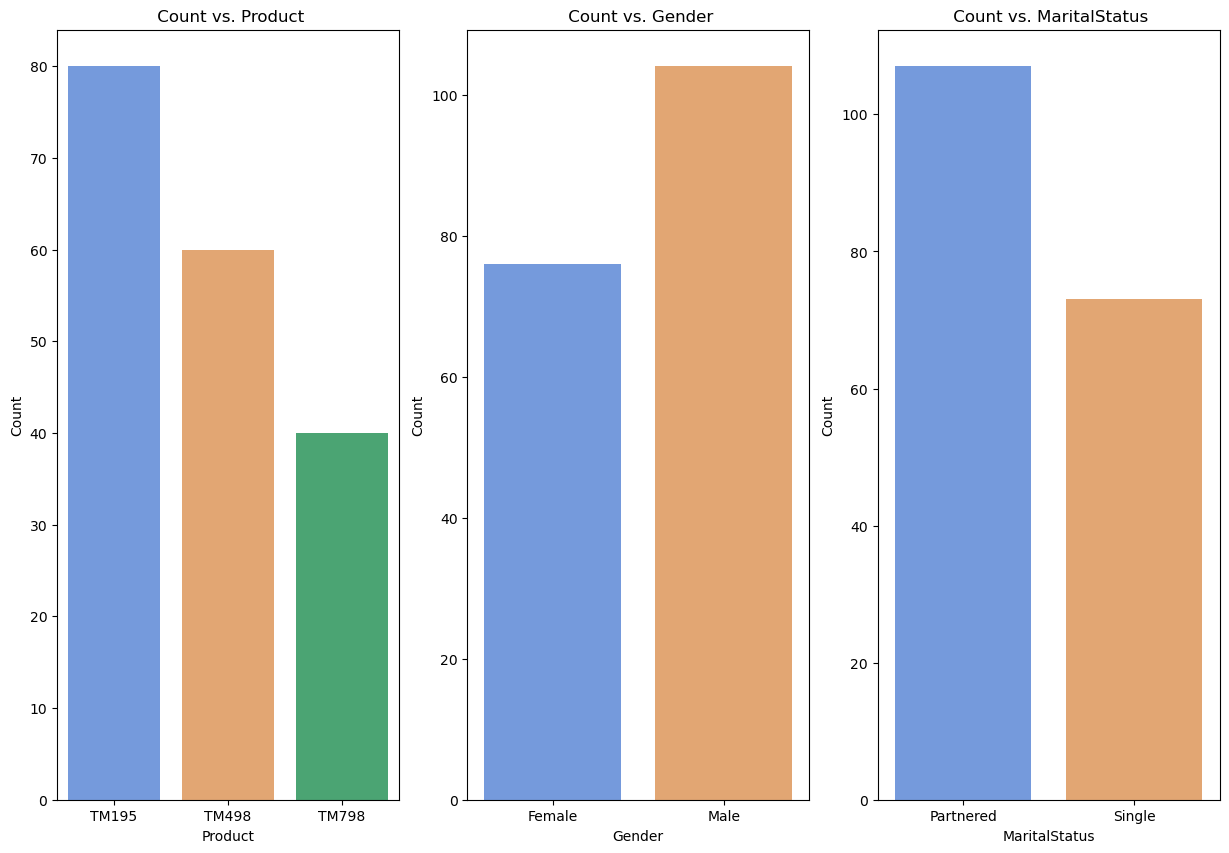

In [39]:
fig, axes = plt.subplots(1,3, figsize=(15,10))
colours = ['cornflowerblue','sandybrown','mediumseagreen']
count = 0
for cat in [df_prod, df_gen, df_mars]:
    sns.barplot(
    data=cat,
    y='Age',
    x=cat.index,
    ax=axes[count],
    palette=colours
    )
    axes[count].set_ylabel('Count')
    axes[count].set_title(f' Count vs. {cat.index.name}')

    count += 1

plt.show()

I've created three bar charts to show the counts across the non-numeric columns. Some of these categories will be investigated further below. The further analysis for gender can be seen below:

In [43]:
df_gender = df.groupby(by=['Product','Gender']).count()
df_gender = df_gender[['Age']].reset_index()

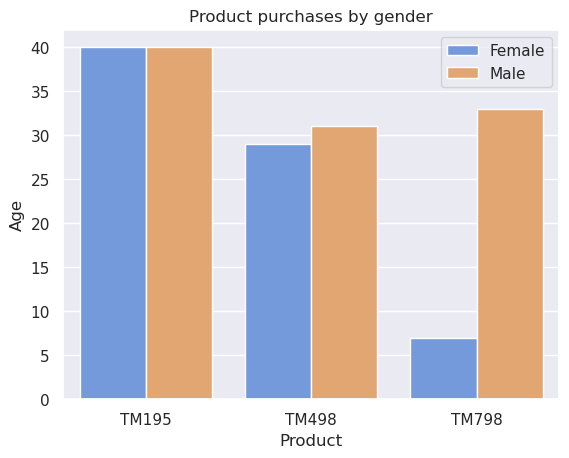

In [47]:
fig, axes = plt.subplots()
sns.set_theme('notebook')

sns.barplot(
    data=df_gender,
    x='Product',
    hue='Gender',
    y='Age',
    ax=axes,
    palette=colours
)
axes.legend()
axes.set_title('Product purchases by gender')

plt.show()

We can see that the main gender difference occurs for product TM798 with the vast majority of purchases being male customers.

We saw above that TM798 showed higher averages across a lot of the numeric categories. I have selected two of these - income and miles ran and producted histograms for all three products.

In [51]:
df_corr = df.copy()

In [53]:
products = df_corr['Product'].sort_values().unique()

dict={}
count = 1
for i in products:
    dict[i] = count
    count += 1

prods = list(dict.keys())

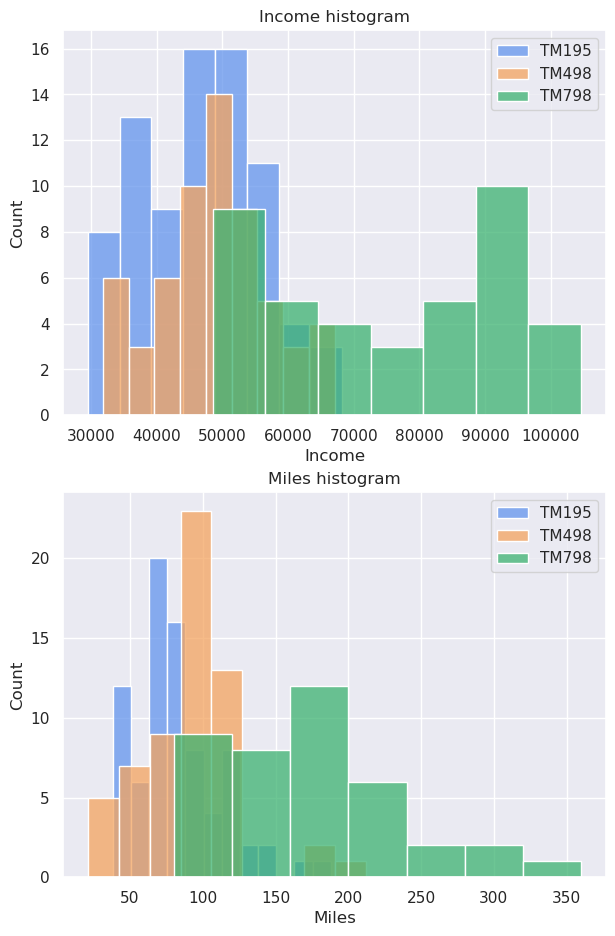

In [81]:
fig, axes = plt.subplots(2,1, figsize=(7,11))
xvals = ['Income','Miles']

countj=0
for j in xvals:
    counti = 0
    for i in prods:
        sns.histplot(
            data=df[j][df['Product'] == i],
            ax=axes[countj],
            label=i,
            color=colours[counti]
        )
        axes[countj].set_title(f'{j} histogram')
        axes[countj].legend()
        counti += 1
    countj += 1
    
plt.show()

It is very clear to see that the distribution for TM798 are much higher across both categories, which is inline with the averages we saw at the start of our analysis.

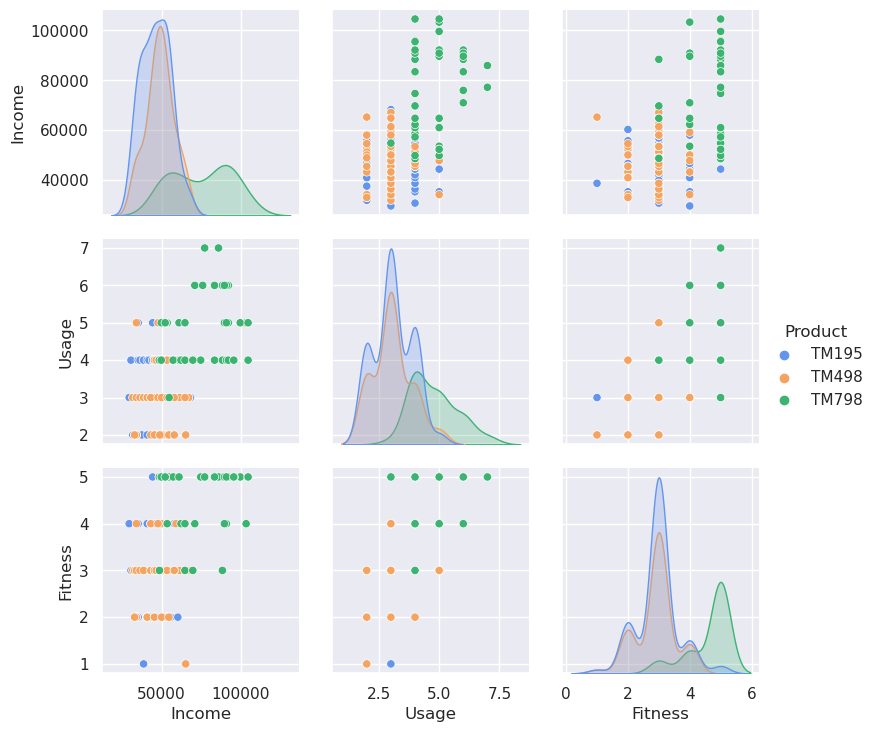

In [184]:
g = sns.PairGrid(data=df, x_vars=['Income','Usage','Fitness'], y_vars=['Income','Usage','Fitness'], hue='Product', diag_sharey=False, palette=colours);
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.kdeplot, fill=True)
g.add_legend()

plt.show()

I have created the above plots to look at the trends between income/usage/self-declared fitness.

In general, we see the trends we would expect - there is a positive correlation between each variable. To analyse this further, I have created a correlation matrix and heatmap. For this to work correctly, all the non-numeric columns have to be converted into numeric ones.

In [75]:
def gender(var):
    if var == 'Male':
        return int(1)
    else:
        return int(0)

df_corr['GenderN'] = df_corr['Gender'].apply(gender)

In [76]:
def product(var):
    return dict[var]

df_corr['ProductN'] = df_corr['Product'].apply(product)

In [77]:
def marry(var):
    if var == 'Single':
        return int(0)
    else:
        return int(1)

df_corr['MaritalN'] = df_corr['MaritalStatus'].apply(marry)

In [78]:
df_corr2 = df_corr[df_corr.columns[~df_corr.columns.isin(['MaritalStatus','Gender','Product'])].to_list()].copy().corr()

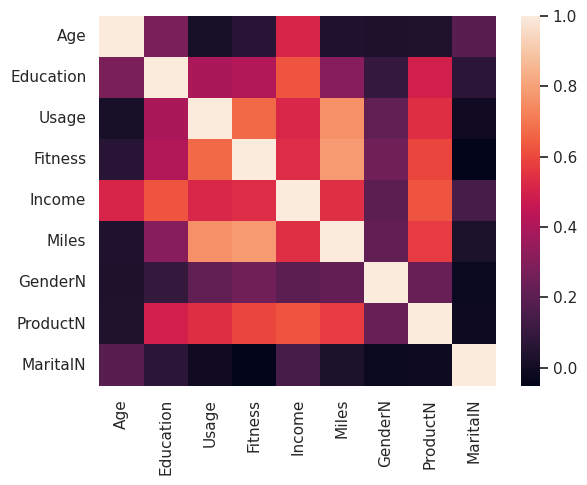

In [79]:
fig, axes = plt.subplots(1)
sns.heatmap(df_corr2, ax=axes)
plt.show()

The heatmap tells us a lot about the correlation between all the variables. In general, we can see that:

1) Age and martial status do not correlated strongly with product purchased.
2) The other categories do correlate with product purchased.
3) The majority of categories correlated strongly with each other (e.g. fitness/usage)

### Conclusions

We can see that there is a correlation between user profiles and the products that they purchase. At least, there is for TM798 a unique customer profile. The other two products are broadly similar in the type of customer who purchases them.

TM195/498 are generally purchased by:

1) Both men and women
2) People with similar incomes, usage, levels of fitness etc...

TM798 is generally purchased by:

1) Men
2) People with a higher income, usage, level of fitness etc...

As a result, we suggest that CardioGoodFitness develop a targetted sales plan for their treadmills, including targeting TM798 for fitter, more wealthy customers. It could be advertised in gyms, for example.

It would also be worth considering if combining TM195 and TM498 would be beneficial from a cost perspective, as they are both purchased by similar customers.